# Supplementary material link to the dictionaries discussion in the section 3 of the paper. 

## You can run the entire notebook

## Importing libraries:

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from FIF import *

# The example of the dictionaries discussion:

### Constructing the dataset:

In [2]:
np.random.seed(1)
m =100
n =30
tps = np.linspace(0,0.7,m)
v = np.linspace(0.5,0.55,n)
X = np.zeros((n,m))
Y = np.zeros((10,m))
for i in range(n):
    for j in range(30):
        X[i,j] = 30 * ((1-tps[j]) ** v[i]) * tps[j] ** v[i]
    for j in range(30,m):
        X[i,j] = X[i,29]+np.random.normal(0,0.3,1)
y = X[0,:].copy()
y[10:25] +=0.8
y[25:30] = y[24]
y[30:m] = y[24] + np.random.normal(0,0.05,m-30)-0.5
y = y.reshape(1,-1)
X_f = np.concatenate((X.copy(),y),axis= 0)





### Function to simulate Brownian motion:

In [3]:
def simul_Brownien_Drift(n = 100,m = 1000,sigma = 0.5,mu = 2,T = 1):
    tps = np.linspace(0,T,m) # Discrétisation du temps
    B = np.zeros((n,m))
    B[:,0] = np.random.normal(0,scale = 0.5,size = n) # départ du MB à 0
    for i in range(1,np.size(tps)):
        B[:,i] = B[:, i-1] + sigma*np.random.normal(0,np.sqrt(tps[2]-tps[1]),n)+ mu*(tps[2]-tps[1]) 
    return B;

### Constructing both dictionaries:

In [4]:
D1 = simul_Brownien_Drift(n=100, m = 100, sigma = 0.3, mu = 0, T =1)
DD = np.zeros((400,100))
DD[:,0:25] = 1 
D = np.concatenate((D1,DD), axis = 0)

### Applying FIF with both dictionaries:

In [5]:
F2  = FIForest(X_f, ntrees=100,time = tps, subsample_size= 11,
               limit = 3,  D= D, innerproduct= 'auto', Dsize = 100, alpha = 1)
S2 =F2.compute_paths()
F3  = FIForest(X_f, ntrees=100,time = tps, subsample_size= 11, 
               limit = 3, D= D1, innerproduct= 'auto', Dsize = 100, alpha = 1)
S3 =F3.compute_paths()

### Plotting the figure:

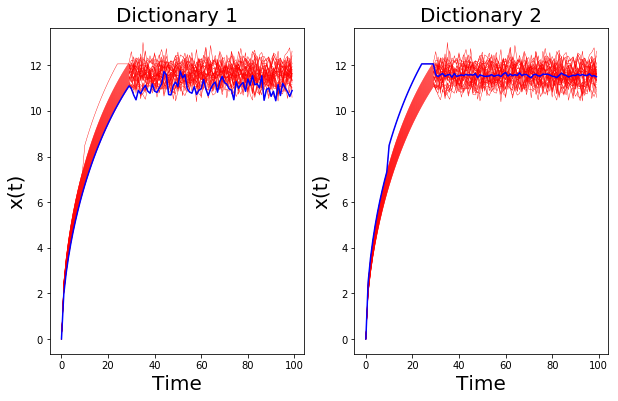

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(121)
for j in range(0,len(S3)):
    plt.plot( X_f[np.argsort(S3)[30-j],:], '-', c="red", zorder=1,linewidth = 0.4, linestyle='-')
    plt.xlabel('Time',size = 20)
    plt.ylabel('x(t)',size = 20)
    plt.title('Dictionary 1', size = 20)
    
plt.plot(X_f[np.argsort(S3)[30],:],c="blue") 
    
plt.subplot(122)   
for j in range(0,len(S2)):
    plt.plot(X_f[np.argsort(S2)[30-j],:], '-', c="red", zorder=1,linewidth = 0.4, )
    plt.xlabel('Time', size = 20)
    plt.ylabel('x(t)',size = 20)
    plt.title('Dictionary 2',size = 20)

plt.plot(X_f[np.argsort(S2)[30],:],c="blue") 

plt.show()

## Importing Datasets:

In [7]:
os.chdir('../Datasets')

In [8]:
X_trainz = pd.read_csv('China_Train.csv', header = None)
X_train = np.array(X_trainz, dtype= float )[:,1:]
y_train = np.array(X_trainz, dtype= int )[:,0]
time = np.linspace(0,1,X_train.shape[1])

In [9]:
X_trainz2 = pd.read_csv('TwoLeadECG_Train.csv', header = None)
X_train2 = np.array(X_trainz2, dtype= float )[:,1:]
y_train2 = np.array(X_trainz2, dtype= int )[:,0]
time2 = np.linspace(0,1,X_train2.shape[1])

# The example with Chinatown dataset:

### Applying FIF with both dictionaries : Gaussian_wavelets and Dyadic_indicator.

In [10]:
np.random.seed(42)
F = FIForest(X_train, ntrees=100, time = time, subsample_size= X_train.shape[0], 
        	D= 'gaussian_wavelets', innerproduct= "auto", alpha = 1)
S = F.compute_paths()
predict = F.predict_label(S,0.285)
F2 = FIForest(X_train, ntrees=100, time = time, subsample_size= X_train.shape[0], 
        	D= 'Dyadic_indicator', innerproduct= "auto", alpha = 1)
S2 = F2.compute_paths()
predict_2 = F2.predict_label(S2,0.28)

### Plotting the results:

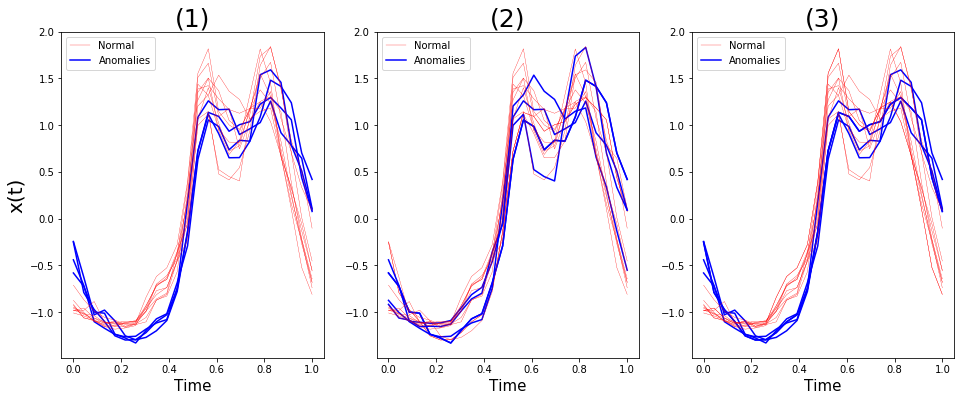

In [11]:
colors = [ matplotlib.cm.viridis_r(x)
            for x in np.linspace(0, 1, len(S)) ]
plt.figure(figsize=(16,6))
n = X_train.shape[0]
plt.subplot(131)
plt.plot(time, X_train[len(colors)-1], c ="r", linewidth = 0.3,label = 'Normal')
plt.plot(time, X_train[0], c ="b",label = 'Anomalies')
for j in range(1,len(colors)-1):
    if (y_train[j] == 1):
        plt.plot(time, X_train[j], c ="r", linewidth = 0.3)
    else:
        plt.plot(time, X_train[j], c ="b")
plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(1)', size = 25)
plt.legend() 
plt.subplot(132)
plt.plot(time, X_train[0], c ="r",linewidth = 0.3,label = 'Normal')
plt.plot(time, X_train[2], c ="b", label = 'Anomalies')
for j in range(len(colors)):
    if (predict[j] == 1):
        plt.plot(time, X_train[j], c ="r", linewidth = 0.3)
    else:
        plt.plot(time, X_train[j], c ="b")
        

plt.title('(2)', size = 25)
plt.xlabel('Time',size = 15)
plt.legend() 
plt.subplot(133) 
plt.plot(time, X_train[len(colors)-1], c ="r", linewidth = 0.3,label = 'Normal')
plt.plot(time, X_train[0], c ="b",label = 'Anomalies')
for j in range(len(colors)):
    if (predict_2[j] == 1):
        plt.plot(time, X_train[j], c ="r", linewidth = 0.3)
    else:
        plt.plot(time, X_train[j], c ="b")
      

    plt.title('(3)', size = 25)
plt.xlabel('Time',size = 15)
 
    
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.viridis_r,
 
                                   norm=plt.Normalize(vmin=0, vmax=1))
plt.legend() 
sm._A = []

plt.show()

# The example with TwoLeadECG dataset:

### Applying FIF with both dictionaries : cosinus and Self_local.

In [12]:
np.random.seed(42)
F = FIForest(X_train2, ntrees=100, time=time2, subsample_size=X_train2.shape[0], 
        	D='cosinus', innerproduct="auto", alpha = 1)
S = F.compute_paths()
predict = F.predict_label(S,0.12)
F2 = FIForest(X_train2, ntrees=20, time = time2, subsample_size=X_train2.shape[0], 
        	D='Self_local', innerproduct="auto", Dsize = 1000, alpha = 1)
S2 = F2.compute_paths()
predict_2 = F2.predict_label(S2,0.12)

### Plotting the results:

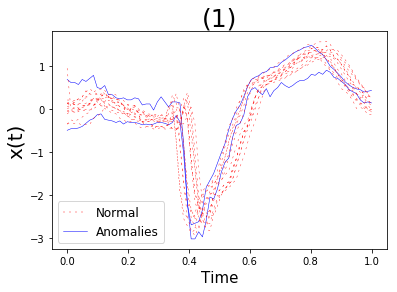

In [13]:
plt.figure(figsize=(6,4))
n = X_train2.shape[0]
# Anomalies are indexed by [0,1,2,3]
plt.plot(time2, X_train2[len(colors)-1], c ="r", linewidth=0.4,
         label='Normal',linestyle='dashed',dashes=(5, 10))

plt.plot(time2, X_train2[0], c ="b",label = 'Anomalies',linewidth=0.5)
for j in range(1,n):
    if (y_train2[j] == 1):
        plt.plot(time2, X_train2[j], c="r",linestyle='dashed', linewidth=0.4,dashes=(5, 10))
    else:
        plt.plot(time2, X_train2[j], c="b",linewidth=0.5 )
plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(1)', size = 25)
plt.legend(fontsize= "large") 
plt.show()

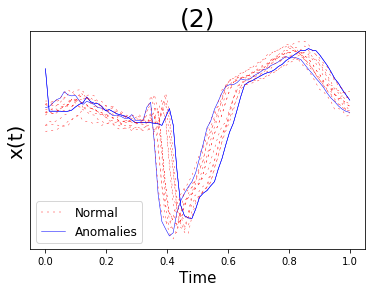

In [14]:
plt.figure(figsize=(6,4))
n = X_train2.shape[0]
plt.plot(time2, X_train2[np.argsort(S)[0]], c ="r",linewidth = 0.4,
         label = 'Normal', linestyle='dashed',dashes=(5, 10))
plt.plot(time2, X_train2[np.argsort(S)[len(S)-1]], c ="b", label = 'Anomalies',linewidth = 0.5 )
for j in range(1,len(colors)):
    if (predict[j] == 1):
        plt.plot(time2, X_train2[j], c ="r", linewidth = 0.4, linestyle='dashed',dashes=(5, 10))
    else:
        plt.plot(time2, X_train2[j], c ="b",linewidth = 0.5 )
        


plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(2)', size = 25)
plt.legend(fontsize= "large") 
plt.yticks([])
plt.show()

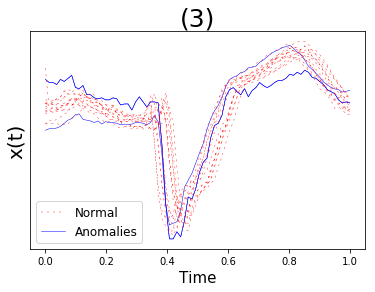

In [15]:
plt.figure(figsize=(6,4))
n = X_train2.shape[0]
plt.plot(time2, X_train2[np.argsort(S2)[0]], c ="r",linewidth = 0.4,label = 'Normal', linestyle='dashed',dashes=(5, 10))
plt.plot(time2, X_train2[np.argsort(S2)[len(S2)-1]], c ="b", label = 'Anomalies',linewidth = 0.5)
for j in range(len(S2)):
    if (predict_2[j] == 1):
        plt.plot(time2, X_train2[j], c ="r", linewidth = 0.4, linestyle='dashed',dashes=(5, 10))
    else:
        plt.plot(time2, X_train2[j], c ="b",linewidth = 0.5)
        


plt.ylabel('x(t)',size = 20)
plt.xlabel('Time',size = 15)
plt.title('(3)', size = 25)
plt.yticks([])
plt.legend(fontsize= "large") 
plt.show()

# The example of the scalar product discussion:

### Constructing the dataset:

In [16]:
m =100
n =100
tps = np.linspace(0,1,m)
v = np.linspace(1,1.4,n)
X = np.zeros((n,m))
Y = np.zeros((10,m))
for i in range(n):
    X[i] = 30 * ((1-tps) ** v[i]) * tps ** v[i]
for i in range(10):
    for j in range(m):
        if (tps[j]<0.2 or tps[j]>0.8):
            Y[i,j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 
        else:
            Y[i,j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.random.normal(0,0.3,1)
Y[:,0] = 0
Y[:,m-1] = 0
Z = np.concatenate((X,Y), axis = 0)



### Applying FIF:

In [17]:
np.random.seed(42)
# L2 scalar product :
F1  = FIForest(Z, D="Dyadic_indicator", time=tps, innerproduct="auto", alpha=1)
S1  = F1.compute_paths()

# L2 derivate scalar product :
F2  = FIForest(Z, D="Multiresolution_linear", time=tps, innerproduct="auto", alpha=0)
S2  = F2.compute_paths()

### Plotting the figure:

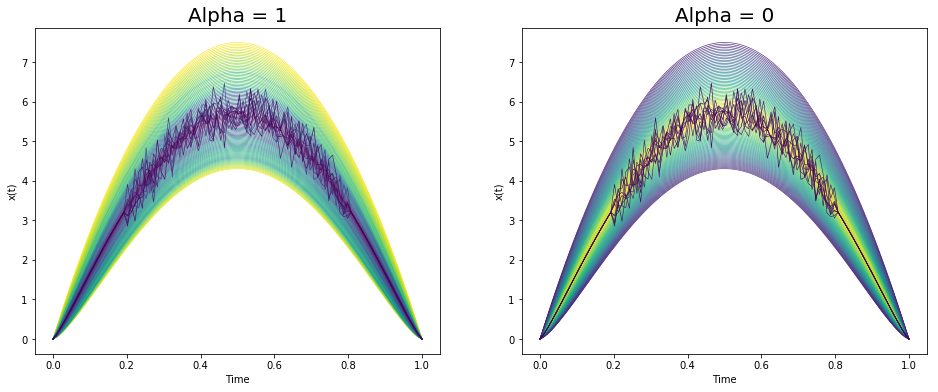

In [18]:
colors = [ matplotlib.cm.viridis_r(x)
            for x in np.linspace(0, 1, len(S2)) ]
plt.figure(figsize=(16,6))
plt.subplot(121)
for j in range(0,len(colors)):
    plt.plot(tps, Z[np.argsort(S1)[109-j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)
    plt.xlabel('Time')
    plt.ylabel('x(t)')
    plt.title('Alpha = 1', size=20)
plt.subplot(122)
for j in range(0,len(colors)):
    plt.plot(tps, Z[np.argsort(S2)[j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)
    plt.xlabel('Time')
    plt.ylabel('x(t)')
    plt.title('Alpha = 0', size=20)

  
    
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.viridis_r,
 
                                   norm=plt.Normalize(vmin=0, vmax=1))
 
sm._A = []
plt.show()